분류 성능비교
==

다루는 내용
--
- 분류 알고리즘 비교
- 교차검증
- 정적 성능평가 Confusion matrix  
- 동적 성능평가 ROC

데이터
--
- 포도주 품질 분류 https://goo.gl/Gyc8K7

출처
--
https://www.kaggle.com/vishalyo990/prediction-of-quality-of-wine/notebook



모듈 불러오기
--

In [1]:
#한글 깨짐 방지
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score 
%matplotlib inline

- fixed acidity - 결합 산도 
- volatile acidity - 휘발성 산도 
- citric acid - 시트르산 
- residual sugar - 잔류 설탕 
- chlorides	- 염화물 
- free sulfur dioxide - 자유 이산화황 
- total sulfur dioxide - 총 이산화황 
- density - 밀도 
- pH - pH 
- sulphates - 황산염 
- alcohol - 알코올 
- quality - 품질 (0 ~ 10 점)

데이터 읽기 (포도주 품질 평가)
--

In [3]:
wine = pd.read_csv('./data/winequality-red.csv')
# 데이터 사본 https://goo.gl/m3eCrf

In [4]:
wine.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
column_list = ["결합산도","휘발성산도","시트르산",
               "잔류설탕","염화물","자유이산화황",
               "총이산화황","밀도","PH","황산염",
               "알코올","품질"]

In [6]:
wine.columns = column_list

In [7]:
wine.head()

,결합산도,휘발성산도,시트르산,잔류설탕,염화물,자유이산화황,총이산화황,밀도,PH,황산염,알코올,품질
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
wine.shape

(1599, 12)

In [9]:
wine.info() # 데이터 정보

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
결합산도      1599 non-null float64
휘발성산도     1599 non-null float64
시트르산      1599 non-null float64
잔류설탕      1599 non-null float64
염화물       1599 non-null float64
자유이산화황    1599 non-null float64
총이산화황     1599 non-null float64
밀도        1599 non-null float64
PH        1599 non-null float64
황산염       1599 non-null float64
알코올       1599 non-null float64
품질        1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


## 여러 특성 한번에 보기 (박스 플롯)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 12 Text xticklabel objects>)

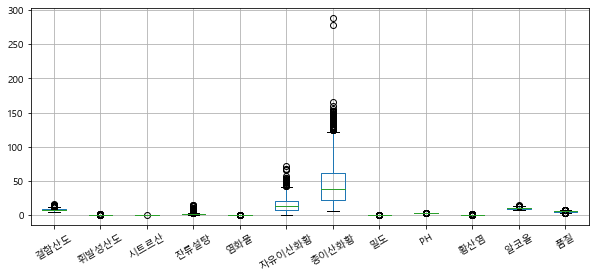

In [17]:
#맨처음에 박스플롯을 그린다 거의 한눈에 다보여주기 때문에
wine.boxplot(figsize = (10,4))
plt.xticks(rotation=30)

줄여서 보기
--

In [19]:
wine.drop(['자유이산화황', '총이산화황'], axis=1)

,결합산도,휘발성산도,시트르산,잔류설탕,염화물,밀도,PH,황산염,알코올,품질
0,7.4,0.700,0.00,1.9,0.076,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,0.99547,3.57,0.71,10.2,5


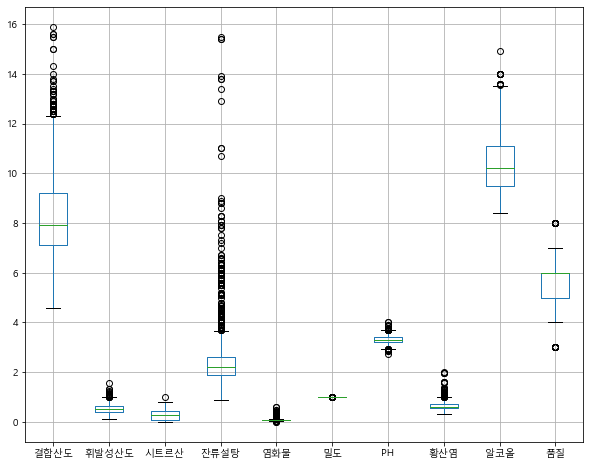

In [23]:
#위에서 크게나온 그림 빼고 다시그림 다른것들을 자세히 보기위해서
#프리 서펄 덱사이드
wine.drop(['자유이산화황', '총이산화황'], axis=1).boxplot(figsize = (10,8))

In [12]:
wine[['알코올', '품질']].head(10)

,알코올,품질
0,9.4,5
1,9.8,5
2,9.8,5
3,9.8,6
4,9.4,5
5,9.4,5
6,9.4,5
7,10.0,7
8,9.5,7
9,10.5,5


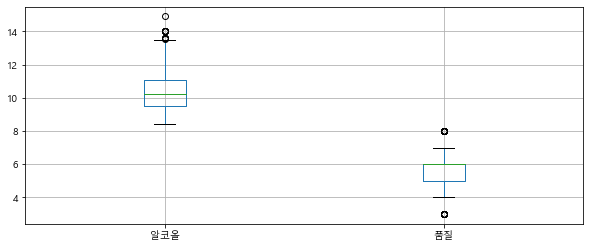

In [15]:
wine[['알코올', '품질']].boxplot(figsize = (10,4))

히스토그램
--

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E3C8950D08>,
      dtype=object)

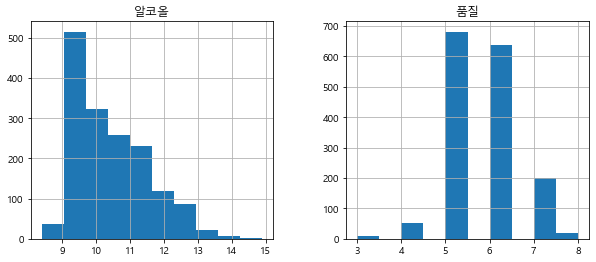

In [14]:
wine[['알코올', '품질']].hist(figsize = (10,4))

품질관련 데이터 파악
--

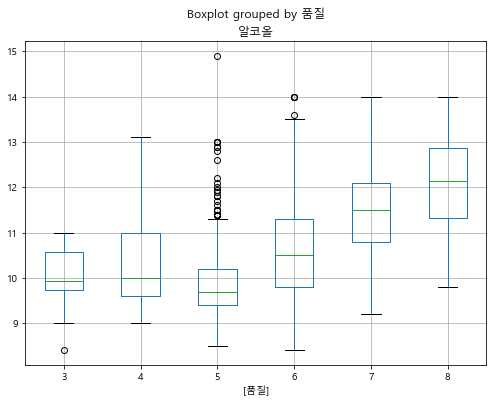

In [24]:
#퀄리티가 3인것만 모아서 그리고 4만모아서 그리고...
wine[['알코올', '품질']].boxplot(by='품질',figsize = (8,6))
#quality가 좋은건 평균적으로 알코올 성분이 좋다.
#포도주도 알코올이 있는것들을 좋아함

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001E3C930E888>,
      dtype=object)

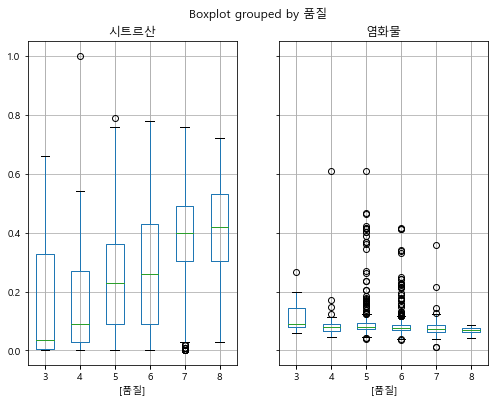

In [25]:
wine1 = wine[[ '염화물', '시트르산', '품질']]
wine1.boxplot(by='품질',figsize = (8,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E3CA624788>,
      dtype=object)

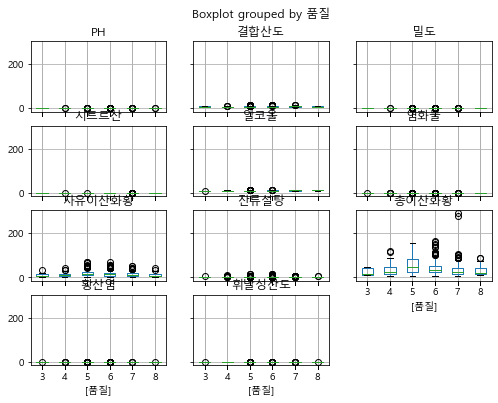

In [26]:
wine.boxplot(by='품질',figsize = (8,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E3CB652548>,
      dtype=object)

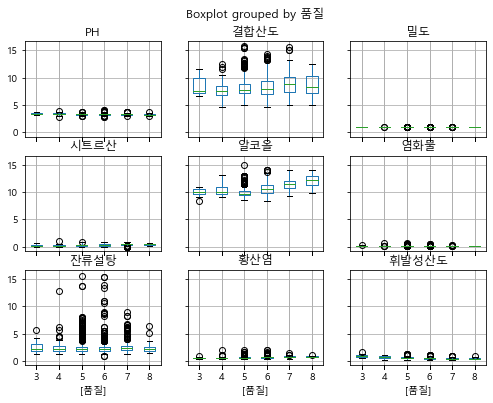

In [27]:
wine.drop(['자유이산화황','총이산화황'], axis=1).boxplot(by='품질',figsize = (8,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E3CD474708>,
      dtype=object)

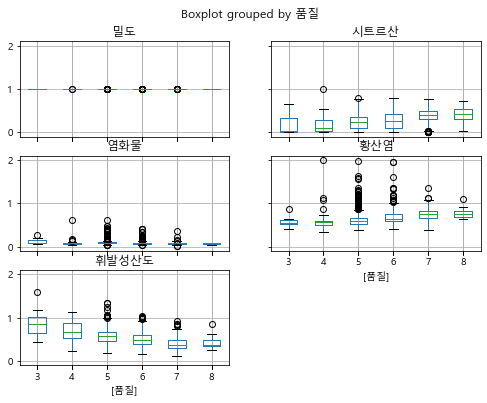

In [28]:
wine.drop(['자유이산화황', '총이산화황','알코올','결합산도',
           '잔류설탕','PH'], axis=1).boxplot(by='품질',figsize = (8,6))
#시트르산은 향료등에 많이사용 향이 많이 난다(감귤류 과일에서 많이 발견)

## 데이터 전처리 (레이블 만들기)

In [71]:
aa=wine['품질'].unique() 
aa.sort()
aa

array([3, 4, 5, 6, 7, 8], dtype=int64)

In [30]:
wine.품질.unique() 

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [31]:
wine['품질'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: 품질, dtype: int64

# 모델 학습 및 평가

In [78]:
X = wine.drop(['품질'], axis = 1) 
y = wine['품질'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 7, stratify=y)

In [79]:
y_train.value_counts()

5    545
6    510
7    159
4     42
8     15
3      8
Name: 품질, dtype: int64

In [80]:
y_test.value_counts()

5    136
6    128
7     40
4     11
8      3
3      2
Name: 품질, dtype: int64

stratify 
편향된 데이터에서 트레인과 테스트를 나누는데 골고루 알맞게 들어가게 만들어 줌. 

In [84]:
model = KNeighborsClassifier(n_neighbors=5)
model = model.fit(X_train, y_train)
print("훈련데이터 점수 :",model.score(X_train,y_train))
print("테스트데이터 점수 :",model.score(X_test,y_test))

훈련데이터 점수 : 0.6833463643471462
테스트데이터 점수 : 0.51875


In [138]:
model.predict(X_test)

array([5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 6, 6, 5, 6, 6, 7, 6, 5,
       5, 5, 5, 6, 5, 5, 5, 6, 6, 6, 5, 5, 5, 5, 7, 6, 5, 6, 5, 6, 6, 7,
       6, 5, 5, 5, 6, 7, 7, 5, 5, 6, 5, 6, 6, 6, 5, 6, 5, 5, 6, 6, 5, 5,
       6, 5, 6, 6, 7, 6, 7, 5, 5, 5, 5, 6, 7, 5, 6, 5, 5, 6, 6, 7, 5, 7,
       6, 7, 6, 5, 6, 6, 6, 6, 5, 6, 7, 7, 5, 6, 6, 6, 5, 5, 5, 5, 6, 5,
       7, 5, 6, 6, 5, 6, 6, 7, 7, 6, 6, 6, 7, 6, 6, 6, 6, 5, 5, 6, 7, 6,
       6, 5, 6, 5, 7, 6, 6, 7, 6, 6, 7, 6, 5, 6, 5, 6, 6, 5, 6, 5, 5, 5,
       5, 5, 6, 7, 5, 5, 5, 5, 5, 5, 6, 6, 6, 7, 7, 5, 6, 6, 5, 5, 5, 6,
       5, 7, 7, 6, 6, 6, 5, 6, 5, 6, 5, 5, 7, 6, 5, 5, 6, 5, 5, 6, 5, 5,
       7, 6, 5, 5, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 7, 5, 5, 5, 6,
       6, 5, 6, 5, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5, 7, 6, 5, 5, 7, 6, 5, 5,
       6, 5, 5, 5, 6, 5, 7, 6, 5, 5, 7, 5, 8, 5, 6, 6, 7, 6, 5, 5, 6, 7,
       5, 5, 5, 5, 5, 6, 5, 6, 6, 5, 5, 6, 5, 6, 7, 6, 7, 6, 6, 6, 5, 5,
       6, 5, 6, 5, 6, 5, 7, 6, 6, 6, 6, 7, 7, 5, 5,

In [139]:
y_test

463     5
992     6
67      5
577     5
527     6
       ..
306     5
869     6
1059    7
842     6
1280    6
Name: 품질, Length: 320, dtype: int64

In [34]:
model = LogisticRegression(C=100)
model = model.fit(X_train, y_train)
print("훈련데이터 점수 :",model.score(X_train,y_train))
print("테스트데이터 점수 :",model.score(X_test,y_test))

C:\Users\vdi02\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vdi02\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


훈련데이터 점수 : 0.5910867865519938
테스트데이터 점수 : 0.615625


# 스케일링을 해서 점수 올리기

In [86]:
#스케일링하면 더 오름
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

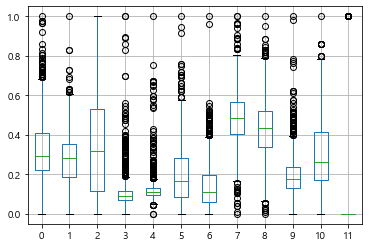

In [88]:
pd.DataFrame(X_train).boxplot()

In [83]:
model = KNeighborsClassifier(n_neighbors=5)
model = model.fit(X_train, y_train)
print("훈련데이터 점수 :",model.score(X_train,y_train))
print("테스트데이터 점수 :",model.score(X_test,y_test))

훈련데이터 점수 : 0.6833463643471462
테스트데이터 점수 : 0.51875


In [37]:
model = LogisticRegression(C=100)
model = model.fit(X_train, y_train)
print("훈련데이터 점수 :",model.score(X_train,y_train))
print("테스트데이터 점수 :",model.score(X_test,y_test))

훈련데이터 점수 : 0.5942142298670836
테스트데이터 점수 : 0.609375


C:\Users\vdi02\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vdi02\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


# 스케일링말고 카테고리로 지정해서 점수 올리는 방법

In [38]:
# 품질이 좋고 나쁜 것을 나누는 기준 설정
# 6.5를 기준으로 bad(0) good(1)으로 나눈다 (임의로 나눈 것임)
bins = (2.9, 6.5, 8.1)#bins 구간을 나눌때 쓴다.(범주설정)(마지막에 8을썼더니 컴퓨터나 8을 뺴버렸다. 그래서 8을 포함시키기 위해 안전하게 8.1을 사용)
#8만 잡게하면 성능이 좋아진다.
group_names = [0, 1]
wine['품질2'] = pd.cut(wine['품질'], bins = bins, labels = group_names)

In [39]:
wine.head(5)

,결합산도,휘발성산도,시트르산,잔류설탕,염화물,자유이산화황,총이산화황,밀도,PH,황산염,알코올,품질,품질2
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [40]:
wine['품질2'].value_counts()

0    1382
1     217
Name: 품질2, dtype: int64

In [41]:
# 예측변수와 레이블을 나눈다
X = wine.drop(['품질', '품질2'], axis = 1) 
y = wine['품질2'] 

In [42]:
X.head(5)

,결합산도,휘발성산도,시트르산,잔류설탕,염화물,자유이산화황,총이산화황,밀도,PH,황산염,알코올
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [43]:
y.value_counts()

0    1382
1     217
Name: 품질2, dtype: int64

MinMax 스케일링
--

In [90]:
# 데이터를 랜덤하게 섞은 후 80%를 훈련데이터로 사용
# random_state 같은 값으로 지정하면 랜덤하게 섞이는 순서가 같다.
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size = 0.2, random_state = 7, stratify=y)

#직접 실습을 해보는데 지금은 80%이지만 다르게 할 수도 있다.
#위에 모델을 바꿔서 6.5가 맛있다가 아니라 8만 맛있다 등 바꿔본다.

In [91]:
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [92]:
# 데이터 프레임에 스케일링 연산을 하면 ndarray로 바뀐다
X_train[:2]

array([[0.6460177 , 0.31506849, 0.83544304, 0.11034483, 0.10016694,
        0.07042254, 0.10954064, 0.67033774, 0.18269231, 0.13939394,
        0.24615385, 0.        ],
       [0.28318584, 0.47945205, 0.36708861, 0.23448276, 0.11853088,
        0.28169014, 0.204947  , 0.46622614, 0.28846154, 0.12121212,
        0.15384615, 0.        ]])

In [93]:
X_train.shape, y_train.shape

((1279, 12), (1279,))

In [94]:
X_test.shape, y_test.shape

((320, 12), (320,))

## KNN(K-최근접 이웃)

In [112]:
model = KNeighborsClassifier(n_neighbors=5)
model = model.fit(X_train, y_train)
print("훈련데이터 점수 :",model.score(X_train,y_train))
print("테스트데이터 점수 :",model.score(X_test,y_test))

훈련데이터 점수 : 0.7881157154026583
테스트데이터 점수 : 0.70625


결정 트리 (Decesion Tree)
--

In [113]:
model = DecisionTreeClassifier()
model = model.fit(X_train, y_train)
print("훈련데이터 점수 :",model.score(X_train,y_train))
print("테스트데이터 점수 :",model.score(X_test,y_test))

훈련데이터 점수 : 1.0
테스트데이터 점수 : 0.7375


## 랜덤 포래스트 (Random Forest Classifier)

In [115]:
model = RandomForestClassifier(n_estimators=300) 
model.fit(X_train, y_train)
print("훈련데이터 점수 :",model.score(X_train,y_train))
print("테스트데이터 점수 :",model.score(X_test,y_test))

훈련데이터 점수 : 1.0
테스트데이터 점수 : 0.778125


##  정적 평가, 혼돈 매트릭스 (confusion_matrix)

In [52]:
pred_rfc = model.predict(X_test)
confusion_matrix(y_test, pred_rfc)
# RandomForest에 대한 confusion_matrix

array([[264,  15],
       [ 17,  24]], dtype=int64)

아래는 모델이 올바르게 예측했는지를 평가하기 위한 값들이다

In [53]:
# 여러 성능 지표를 출력한다
print(classification_report(y_test, pred_rfc))
#밑에 숫자는 0을 기준으로 0.94 맞춤 
#pos 긍정이 아닌 내가 찾고자 하는 답을 pos라고 봄(암환자)

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       279
           1       0.62      0.59      0.60        41

    accuracy                           0.90       320
   macro avg       0.78      0.77      0.77       320
weighted avg       0.90      0.90      0.90       320



- Precision  = 모델이 옳다고 한 것이 실제로 옳은 비율     TP / ( TP + FP ) 
- Recall =  실제 정답인 것들 중, 모델이 정답이라고 예측한 것    TP / TP+FN
- f1-score = Precision과 Recall의 조화평균  (2 x  Precision x Recall ) /  (Precision + Recall)
- support는 이 모델에서 응답한 샘플의 수이다

## SVM

In [116]:
model = LinearSVC()
model.fit(X_train, y_train)
print("훈련데이터 점수 :",model.score(X_train,y_train))
print("테스트데이터 점수 :",model.score(X_test,y_test))

훈련데이터 점수 : 0.7130570758405004
테스트데이터 점수 : 0.725


Logistic Regression
--

In [117]:
model = LogisticRegression()
model.fit(X_train, y_train)
print("훈련데이터 점수 :",model.score(X_train,y_train))
print("테스트데이터 점수 :",model.score(X_test,y_test))

훈련데이터 점수 : 0.7107114933541829
테스트데이터 점수 : 0.71875


C:\Users\vdi02\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vdi02\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


ROC로 성능 평가 (맞춘 순서를 평가)
--

In [120]:
model = LogisticRegression() 
model.fit(X_train, y_train)

y_score = model.predict(X_test)
fpr, tpr, _ = roc_curve(y_test, model.decision_function(X_test))
roc_auc = auc(fpr, tpr)

#roc_auc는 그래프의 넓이를 구한다. 초반에 빨리 올라가면 면적이 넓다.
#가장 낮은건 평균인 0.5, 최대는 1이 된다.
roc_auc

C:\Users\vdi02\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vdi02\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


ValueError: multiclass format is not supported

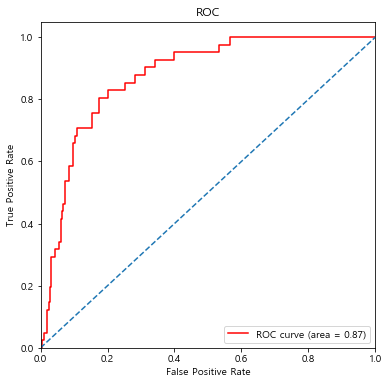

In [119]:
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='r', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")

## Cross validation(교차 검증)

In [58]:
#rfc 랜덤포레스트 모델 위에 변수로 선언해줌(제일 잘나와서)
# estimator = 모델, cv는 분할 테스트 숫자
model = RandomForestClassifier(n_estimators=300)
rfc_eval = cross_val_score(model, X_train, y_train, cv = 5)  
rfc_eval  # 5번의 교차 검증 결과를 보여준다

array([0.89494163, 0.890625  , 0.89453125, 0.92156863, 0.91764706])

In [59]:
rfc_eval.mean()

0.903862714103151

# 그리드 서치

In [60]:
from sklearn.model_selection import GridSearchCV

In [121]:
param_grid = {"n_estimators":[10,30,50],
              "max_features":[2,4,8]}
model = RandomForestClassifier(random_state=7)
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5,
                          scoring="accuracy")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False, random_state=7,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'m

In [62]:
print("최상의 하이퍼파라메터 조합 :",grid_search.best_params_)
print("최상의 점수 :",grid_search.best_score_)

최상의 하이퍼파라메터 조합 : {'max_features': 2, 'n_estimators': 50}
최상의 점수 : 0.9077404222048475


In [63]:
print("최상의 평가자 :",grid_search.best_estimator_)

최상의 평가자 : RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [122]:
model = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
model.fit(X_train,y_train)
print("훈련데이터 점수 :",model.score(X_train,y_train))
print("테스트데이터 점수 :",model.score(X_test,y_test))

훈련데이터 점수 : 0.9992181391712275
테스트데이터 점수 : 0.76875


# 히트맵

In [129]:
result = pd.DataFrame(grid_search.cv_results_)#그리드 서치의 모든정보
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.016591,0.002413,0.001598,4.895921e-04,2,10,"{'max_features': 2, 'n_estimators': 10}",0.750973,0.750973,0.714844,0.682353,0.759843,0.731822,0.029136,9
1,0.039977,0.000632,0.002998,1.168008e-07,2,30,"{'max_features': 2, 'n_estimators': 30}",0.758755,0.770428,0.753906,0.713725,0.767717,0.752932,0.020455,5
2,0.065362,0.000797,0.004597,4.898430e-04,2,50,"{'max_features': 2, 'n_estimators': 50}",0.750973,0.782101,0.777344,0.729412,0.783465,0.764660,0.021187,1
3,0.018789,0.000400,0.001399,4.894147e-04,4,10,"{'max_features': 4, 'n_estimators': 10}",0.719844,0.739300,0.742188,0.705882,0.771654,0.735731,0.022260,8
4,0.053966,0.001266,0.003200,3.987978e-04,4,30,"{'max_features': 4, 'n_estimators': 30}",0.766537,0.766537,0.742188,0.701961,0.771654,0.749805,0.025987,6
5,0.089947,0.001676,0.004797,3.995658e-04,4,50,"{'max_features': 4, 'n_estimators': 50}",0.762646,0.789883,0.730469,0.717647,0.775591,0.755278,0.027185,4
6,0.028383,0.001019,0.001400,4.896094e-04,8,10,"{'max_features': 8, 'n_estimators': 10}",0.739300,0.758755,0.734375,0.729412,0.744094,0.741204,0.010067,7
7,0.082353,0.001022,0.002999,1.168008e-07,8,30,"{'max_features': 8, 'n_estimators': 30}",0.778210,0.785992,0.746094,0.721569,0.755906,0.757623,0.023092,3
8,0.136719,0.001468,0.004997,2.156865e-06,8,50,"{'max_features': 8, 'n_estimators': 50}",0.782101,0.805447,0.730469,0.725490,0.771654,0.763096,0.030701,2


In [131]:
scores = np.array(result.mean_test_score).reshape(3,3)
scores

array([[0.73182174, 0.75293198, 0.76465989],
       [0.73573104, 0.74980453, 0.75527756],
       [0.74120407, 0.75762314, 0.76309617]])

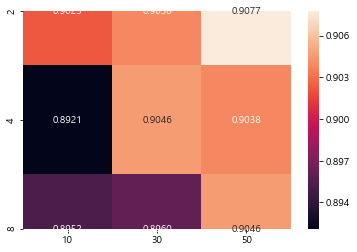

In [66]:
sns.heatmap(data=scores,
            xticklabels=param_grid["n_estimators"],
            yticklabels=param_grid["max_features"], 
            annot=True,
            fmt=".4f")
#상관관계 볼때 heatmap사용

# pipeline

In [67]:
X = wine.drop(['품질', '품질2'], axis = 1) 
y = wine['품질2'] 

In [68]:
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size = 0.2, random_state = 7)

In [69]:
from sklearn.pipeline import make_pipeline

In [70]:
#알아서 코드 돌려줌.
pipe = make_pipeline(MinMaxScaler(), RandomForestClassifier())
param_grid = {'randomforestclassifier__n_estimators': [30, 50, 100, 300], 
              'randomforestclassifier__max_depth': [1,3,5,10],
              'randomforestclassifier__max_features':[2,4,8]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(X_train, y_train)

print("최상의 크로스 밸리데이션 점수: {:.2f}".format(grid.best_score_))
print(grid.best_params_)

최상의 크로스 밸리데이션 점수: 0.91
{'randomforestclassifier__max_depth': 10, 'randomforestclassifier__max_features': 4, 'randomforestclassifier__n_estimators': 300}


In [134]:
wine.corr()

,결합산도,휘발성산도,시트르산,잔류설탕,염화물,자유이산화황,총이산화황,밀도,PH,황산염,알코올,품질
결합산도,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
휘발성산도,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
시트르산,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
잔류설탕,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
염화물,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
자유이산화황,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
총이산화황,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
밀도,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
PH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
황산염,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


C:\Users\vdi02\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\vdi02\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


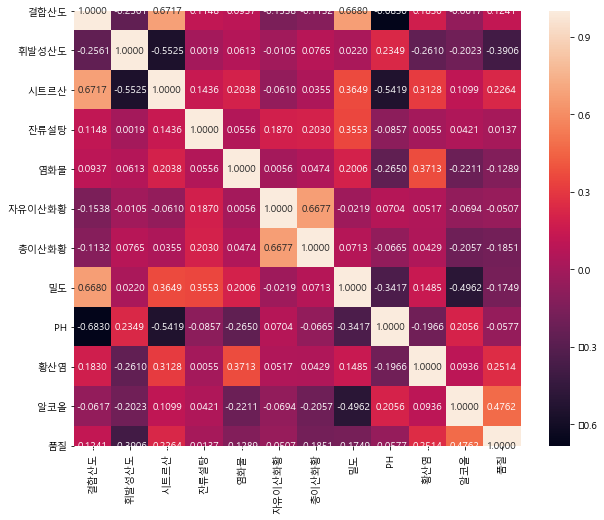

In [136]:
plt.figure(figsize=(10,8))
sns.heatmap(data=wine.corr(),
           annot=True,
           fmt=".4f")

In [137]:
from sklearn.externals import joblib
joblib.dump(model, 'filename.pkl')

C:\Users\vdi02\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['filename.pkl']